In [1]:
import pandas as pd
import wikipediaapi as api
import numpy as np
import matplotlib.pylab as plt
import wikipedia as wikip
from collections import Counter
import random as rd
import json
import requests
from statistics import mean
from bs4 import BeautifulSoup as bs
import urllib3
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## Ersten 30 Links

In [2]:
def getOrderedLinks(wikipage):
    #try:
    http = urllib3.PoolManager()
    response = http.request("GET", wikipage)
    soup = bs(response.data)
    soup = soup.find(id="mw-content-text")
    link_list = soup.find_all("a",href=re.compile("/wiki/"))
    return link_list
    #except:
        #print(wikipage)
        
def filterLinks(soup):
    reg = re.compile("^(?!/wiki/Datei:).+")
    reg2 = re.compile("^(?!/wiki/Spezial:).+")
    reg3 = re.compile("^/wiki")
    filteredList = [e["title"] for e in soup if reg.match(e["href"]) and reg2.match(e["href"]) and reg3.match(e["href"])]
    return filteredList

def cutList(titleList, length):
    result = ((titleList[:length]))
    return list(dict.fromkeys(result))



In [3]:
wiki = api.Wikipedia('Datenanalyse', 'de')

## Speichern der Listen als Textdateien

In [4]:
def save(liste, dateipfad):
    with open(dateipfad, 'w', encoding='utf-8') as datei:
        json.dump(liste, datei, ensure_ascii=False)

In [5]:
def WikiPageView(name, granularity, date_start, date_end):
    #YYYYMMDD
    # Calling monthly page views of each species 
    address = "https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/de.wikipedia.org/all-access/user/" + name + "/" + granularity + "/" + date_start + "/" + date_end
    # Personal username for identification for the Wikipedia API
    headers = {'User-Agent': 'marek.seipel@web.de'}
    
    resp = requests.get(address, headers=headers)
    details = resp.json()
    
    return details

## Ermittel Forward-Links mit den höchsten Aufrufen für jeden Random-Member

In [ ]:
%run -i "PageviewAPI.ipynb"

### Gepspeicherte Listen

In [ ]:
nahost_liste = ["Resolution 279 des UN-Sicherheitsrates", "Anschlag auf die Multinationalen Streitkräfte im Libanon am 23. Oktober 1983", "Israelische Friedensdiplomatie", "Nahostkonflikt", "Secure Plus", "Streitkräfte Syriens", "Israelische Verteidigungsstreitkräfte", "Bil'in", "Liberty (Schiff, 1945)", "Resolution 1559 des UN-Sicherheitsrates", "Beziehungen zwischen dem Iran und den Vereinigten Staaten", "Madrider Konferenz", "Resolution 3379 der UN-Generalversammlung", "Schebaa-Farmen", "Kyl-Bingaman Amendment", "HALIBA", "Palästinensische Flüchtlinge im Libanon", "Yitzhak Laor", "Affäre um deutsche Raketenexperten in Ägypten", "Farbe Rot", "Stimme des Friedens", "Resolution 46/86 der UN-Generalversammlung", "Ägyptisches Heer", "Operation Wooden Leg", "Genfer Nahostkonferenz", "Irakisch-israelische Beziehungen", "Sar-El", "Mitla-Pass", "Israelische Atomwaffen", "Beit Hanun", "Vereinigte Arabische Republik", "Arabisch-israelische Kriege", "Abnutzungskrieg", "Artillerieangriff auf Kana", "Resolution 425 des UN-Sicherheitsrates", "Middle East Forum", "Friedensprozess im Nahen Osten", "Merhav Mugan", "Libyan-Arab-Airlines-Flug 114", "Shministim", "Pogrom von Aden", "Gusch Etzion", "Grüne Linie", "Boycott, Divestment and Sanctions", "Redemptoris nostri cruciatus", "Liste der Gouvernements der Palästinensischen Autonomiebehörde", "Operation Früchte des Zorns", "Jordan-Wasserfrage", "Qassam-Rakete", "Chiyam", "Auspicia quaedam", "Ababil", "Dis:orient", "UN-Teilungsplan für Palästina", "Khartum-Resolution", "Roadmap (Nahostkonflikt)", "Vertreibung von Juden aus arabischen und islamischen Ländern", "Internationale Anerkennung Israels", "Al-Quds-Tag", "Resolution 803 des UN-Sicherheitsrates", "Resolution 446 des UN-Sicherheitsrates", "Genfer Initiative", "Rogers-Plan", "EcoPeace", "Schovrim Schtika", "Resolution 1583 des UN-Sicherheitsrates", "Geschichte des Staates Israel", "Palästina – Frieden, nicht Apartheid", "Ölpreiskrise", "Lawon-Affäre", "Resolution 194 der UN-Generalversammlung", "Internationale Anerkennung des Staates Palästina", "Resolution 648 des UN-Sicherheitsrates", "Schlacht von Karame", "Battir", "Sperranlage um den Gazastreifen", "Massaker von Sabra und Schatila", "Terrorabwehr in Israel", "Washington Report on Middle East Affairs", "Machal", "Palästinensisches Flüchtlingsproblem", "Resolution 659 des UN-Sicherheitsrates", "Massaker am Flughafen Lod", "Irakische Streitkräfte", "Libanesische Gefangene als Verhandlungsmasse", "Anlage 1391", "Südlibanesische Armee", "Blaue Linie (Libanon)", "Israelisch-Palästinensischer Konflikt", "UN-Sonderkoordinatorin für den Libanon", "Vereinigtes Arabisches Königreich", "Operation Nördlicher Schutzschild", "Iranisch-israelische Beziehungen", "Schachgegenolympiade 1976", "Be’er-Scheva-Gefängnis", "Vertreibung der Palästinenser aus Kuwait 1991", "Anglo-amerikanisches Untersuchungskomitee", "Bund Arabischer Republiken", "Lynchmord von Ramallah", "Rachel Corrie (Schiff)"]
exp = ["Nahostkonflikt", "Staat Palästina"]
ny = ["Bad Honnef"]

### Lineare Regression

In [6]:
page = wiki.page("Nahostkonflikt")
fw = getOrderedLinks('https://de.wikipedia.org/wiki/' + "Nahostkonflikt")
fw = filterLinks(fw)
fw = cutList(fw,30)

file = WikiPageView("Schach", "daily", "20231001" , "20231030")
items = file['items']


training = np.zeros((len(items), 30))

for i in range(len(fw)):
    file = WikiPageView(fw[i], "daily", "20231001" , "20231030")
    items = file['items']
    for j in range(len(items)):
        training[j][i] = items[j]['views']


y = []
file = WikiPageView("Nahostkonflikt", "daily", "20231001" , "20231030")
items = file['items']
for i in range(len(items)):
    y.append(items[i]['views'])
y = np.array(y)

np.set_printoptions(suppress=True)

print(training)
print(y)



reg = LinearRegression().fit(training, y)
reg.score(training,y)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearRegression())
])
pipe.fit(training, y)


[[  2264.    325.    354.      3.    116.    262.    513.    172.    204.
     235.      7.    120.      1.      4.    108.   1573.   1578.     18.
      39.      3.     30.      4.    466.    610.    138.     44.      0.
       0.      0.      0.]
 [  1745.    276.    300.      0.    125.    279.    393.    153.     77.
     231.     12.    121.      2.      1.     90.   1230.   1380.     10.
      32.      1.     27.      1.    450.    643.    118.     29.      0.
       0.      0.      0.]
 [  1828.    317.    366.      2.    132.    265.    497.    171.     36.
     275.      8.    136.      3.      0.    116.   1410.   1762.     12.
      39.      0.     45.      3.    476.    604.    126.     44.      0.
       0.      0.      0.]
 [  1532.    229.    292.      3.    103.    258.    408.    181.     46.
     269.     16.    113.      2.      1.    129.   1252.   1745.     18.
      19.      2.     24.      1.    457.    648.    124.     41.      0.
       0.      0.      0.]
 [  

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [7]:
test = np.zeros((30,30))
for i in range(len(fw)):
    file = WikiPageView(fw[i], "daily", "20231101" , "20231130")
    items = file['items']
    for j in range(len(items)):
        test[j][i] = items[j]['views']
np.set_printoptions(suppress=True)
print(test)

[[29820. 32091. 12817.    10.   538. 12870.  2897.   814.   708.   881.
    193.  4567.    22.   100.  2205.  4497.  4454.    72.    51.    16.
    477.    25.   408.   437.   126.    54.     0.     0.     0.     0.]
 [24802. 25321. 10204.    15.   571. 11552.  2652.   710.   672.   813.
    163.  4015.    20.    80.  1737.  3549.  4205.    95.    57.    14.
    425.    24.   498.   521.   163.    57.     0.     0.     0.     0.]
 [23730. 22453. 10025.     7.   500. 10582.  2458.   637.   625.   837.
    160.  3384.    19.    77.  1858.  3262.  4127.    77.    31.    10.
    381.    29.   403.   429.   106.    47.     0.     0.     0.     0.]
 [20153. 17728.  6904.     4.   439.  9451.  2262.   678.   594.   626.
    135.  3914.    16.    56.  1640.  3398.  3268.    85.    35.    17.
    396.    22.   383.   480.    92.    35.     0.     0.     0.     0.]
 [22007. 22824. 10299.     5.   442. 10611.  2590.   663.   654.   817.
    163.  3962.    14.    66.  1954.  3898.  3731.    90.   

In [8]:
pred = pipe.predict(test)
file = WikiPageView("Nahostkonflikt", "daily", "20231101" , "20231130")
items = file['items']
actual = []
for i in range(len(items)):
    actual.append(items[i]['views'])
print(actual)
print(pred)

[6547, 5859, 5249, 4494, 5025, 5171, 4301, 4007, 3652, 3164, 2942, 3541, 4297, 3957, 3345, 3133, 2708, 2131, 2697, 2948, 2263, 2343, 2090, 1840, 1220, 1652, 1955, 1731, 1703, 1717]
[ 9496.09033624  7859.29050408  1800.66996211  8574.32824241
  7031.0798711   6866.43243076 -1794.2825456   7266.62506469
 -4720.69007142  2443.98944675  3964.12951742  2380.91449907
  6752.0711951   5673.4765482   2653.649805    6554.4834484
  1554.52266038   -14.55712712  1131.82020214  1892.10393377
   873.98665811   107.68732974   801.49294238  1357.54230101
  -760.18860372 -1263.62664377  -381.20787644  -382.26887358
  1517.01718776   587.55969519]


In [9]:
pipe.get_params()
#GridSearchCV(estimator=pipe, param_grid=

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', LinearRegression())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': LinearRegression(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__copy_X': True,
 'model__fit_intercept': True,
 'model__n_jobs': None,
 'model__positive': False}

153

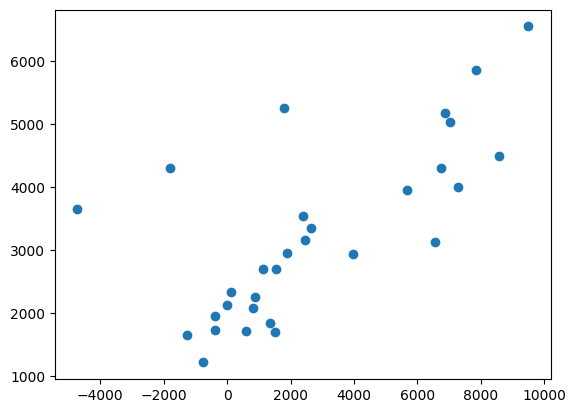

In [10]:
file = WikiPageView("Nahostkonflikt", "daily", "20230701" , "20231130")
items = file['items']
plt.scatter(pred,actual)
len(items)